In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

In [3]:
df=pd.read_csv('Sentiment_Analysis_NLTK.csv')
df=df.head(1000)

EDA

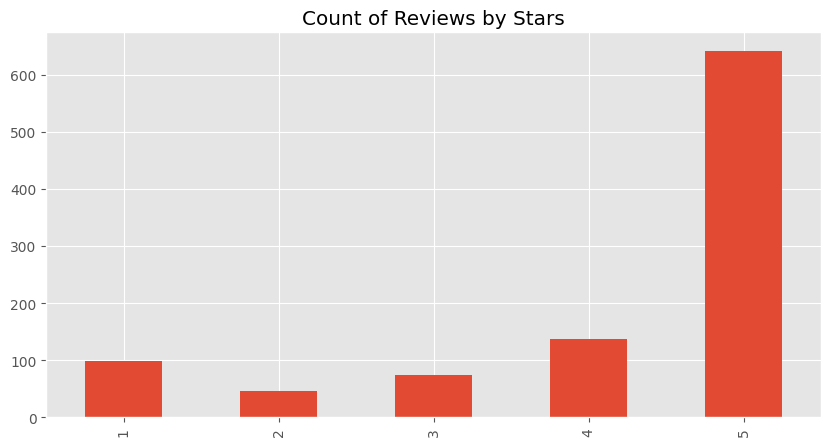

In [4]:
ax=df['Score'].value_counts().sort_index()\
   .plot(kind='bar',
         title='Count of Reviews by Stars',
         figsize=(10,5))
ax.set_label('Reviews by Stars')
plt.show()

Doing basic NLTK operations on dataset

In [5]:
ex= df['Text'][47]
print(ex)

The flavors are good.  However, I do not see any differce between this and Oaker Oats brand - they are both mushy.


In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# making tokens of ex

tokens= nltk.word_tokenize(ex)
tokens[:10]                     # Taking first 10 tokens of example

['The', 'flavors', 'are', 'good', '.', 'However', ',', 'I', 'do', 'not']

In [8]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [9]:
tagged= nltk.pos_tag(tokens)
tagged[:10]

[('The', 'DT'),
 ('flavors', 'NNS'),
 ('are', 'VBP'),
 ('good', 'JJ'),
 ('.', '.'),
 ('However', 'RB'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ('not', 'RB')]

In [10]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [11]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [12]:
entities= nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  The/DT
  flavors/NNS
  are/VBP
  good/JJ
  ./.
  However/RB
  ,/,
  I/PRP
  do/VBP
  not/RB
  see/VB
  any/DT
  differce/NN
  between/IN
  this/DT
  and/CC
  (PERSON Oaker/NNP Oats/NNP)
  brand/NN
  -/:
  they/PRP
  are/VBP
  both/DT
  mushy/NNS
  ./.)


##VADER Sentiment Scoring

In [13]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia= SentimentIntensityAnalyzer() 

Taking some examples of polarity scores

In [15]:
sia.polarity_scores('I am not really happy')

{'neg': 0.517, 'neu': 0.483, 'pos': 0.0, 'compound': -0.4964}

In [16]:
sia.polarity_scores('You seems to be quite happy,how?')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [17]:
sia.polarity_scores('How can you be happy')

{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.5719}

In [18]:
sia.polarity_scores('you are an idiot')

{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.5106}

In [19]:
sia.polarity_scores(ex)

{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.4404}

Implementing polarity scores on complete dataset

In [20]:
res= {}
for i,row in tqdm(df.iterrows(), total=len(df)):
  text = row['Text']
  myid = row['Id']
  res[myid]= sia.polarity_scores(text)


  0%|          | 0/1000 [00:00<?, ?it/s]

In [21]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how='left')
vaders.head(3)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


VADER Results Plots

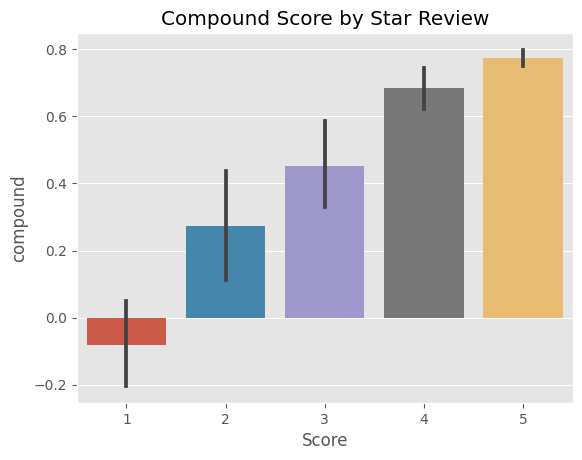

In [22]:
ax= sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Star Review')
plt.show()

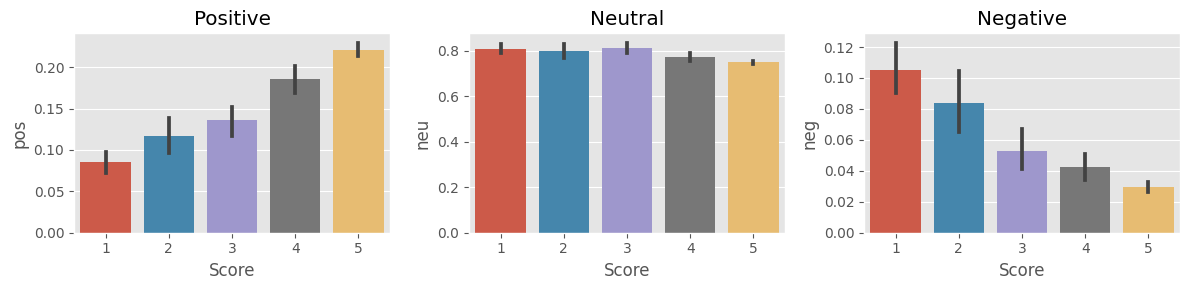

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Using Roberta pretrained model

In [24]:
pip install Sentencepiece

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [26]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [27]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

C:\Python310\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hp\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [28]:
# Polarity scores on example using vader results
print(ex)
sia.polarity_scores(ex)

The flavors are good.  However, I do not see any differce between this and Oaker Oats brand - they are both mushy.


{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.4404}

In [29]:
# Polarity scores on example using roberta model

def polarity_scores_roberta(ex):

  encoded_text= tokenizer(ex, return_tensors='pt')
  op= model(**encoded_text)
  scores= op[0][0].detach().numpy()
  scores= softmax(scores)
  scores_dict = {
      'roberta_neg' : scores[0],
      'roberta_neu' : scores[1],
      'roberta_pos' : scores[2]
  }
  return scores_dict



In [30]:
res= {}

for i,row in tqdm(df.iterrows(), total=len(df)):

  try:
    text = row['Text']
    myid = row['Id']

    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    for key, value in vader_result.items():
      vader_result_rename[f"vader_{key}"] = value

    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result_rename, **roberta_result}      # Combining two dictionaries 
  
    res[myid]= both
  
  except RuntimeError:
    print(f'Broke for id {myid}')
    

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863


In [37]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [45]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
result_df1 = pd.merge(df,result_df, how='left')

# Comparing polarity scores of vader and roberta model

In [47]:
result_df1.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg',
       'roberta_neu', 'roberta_pos'],
      dtype='object')

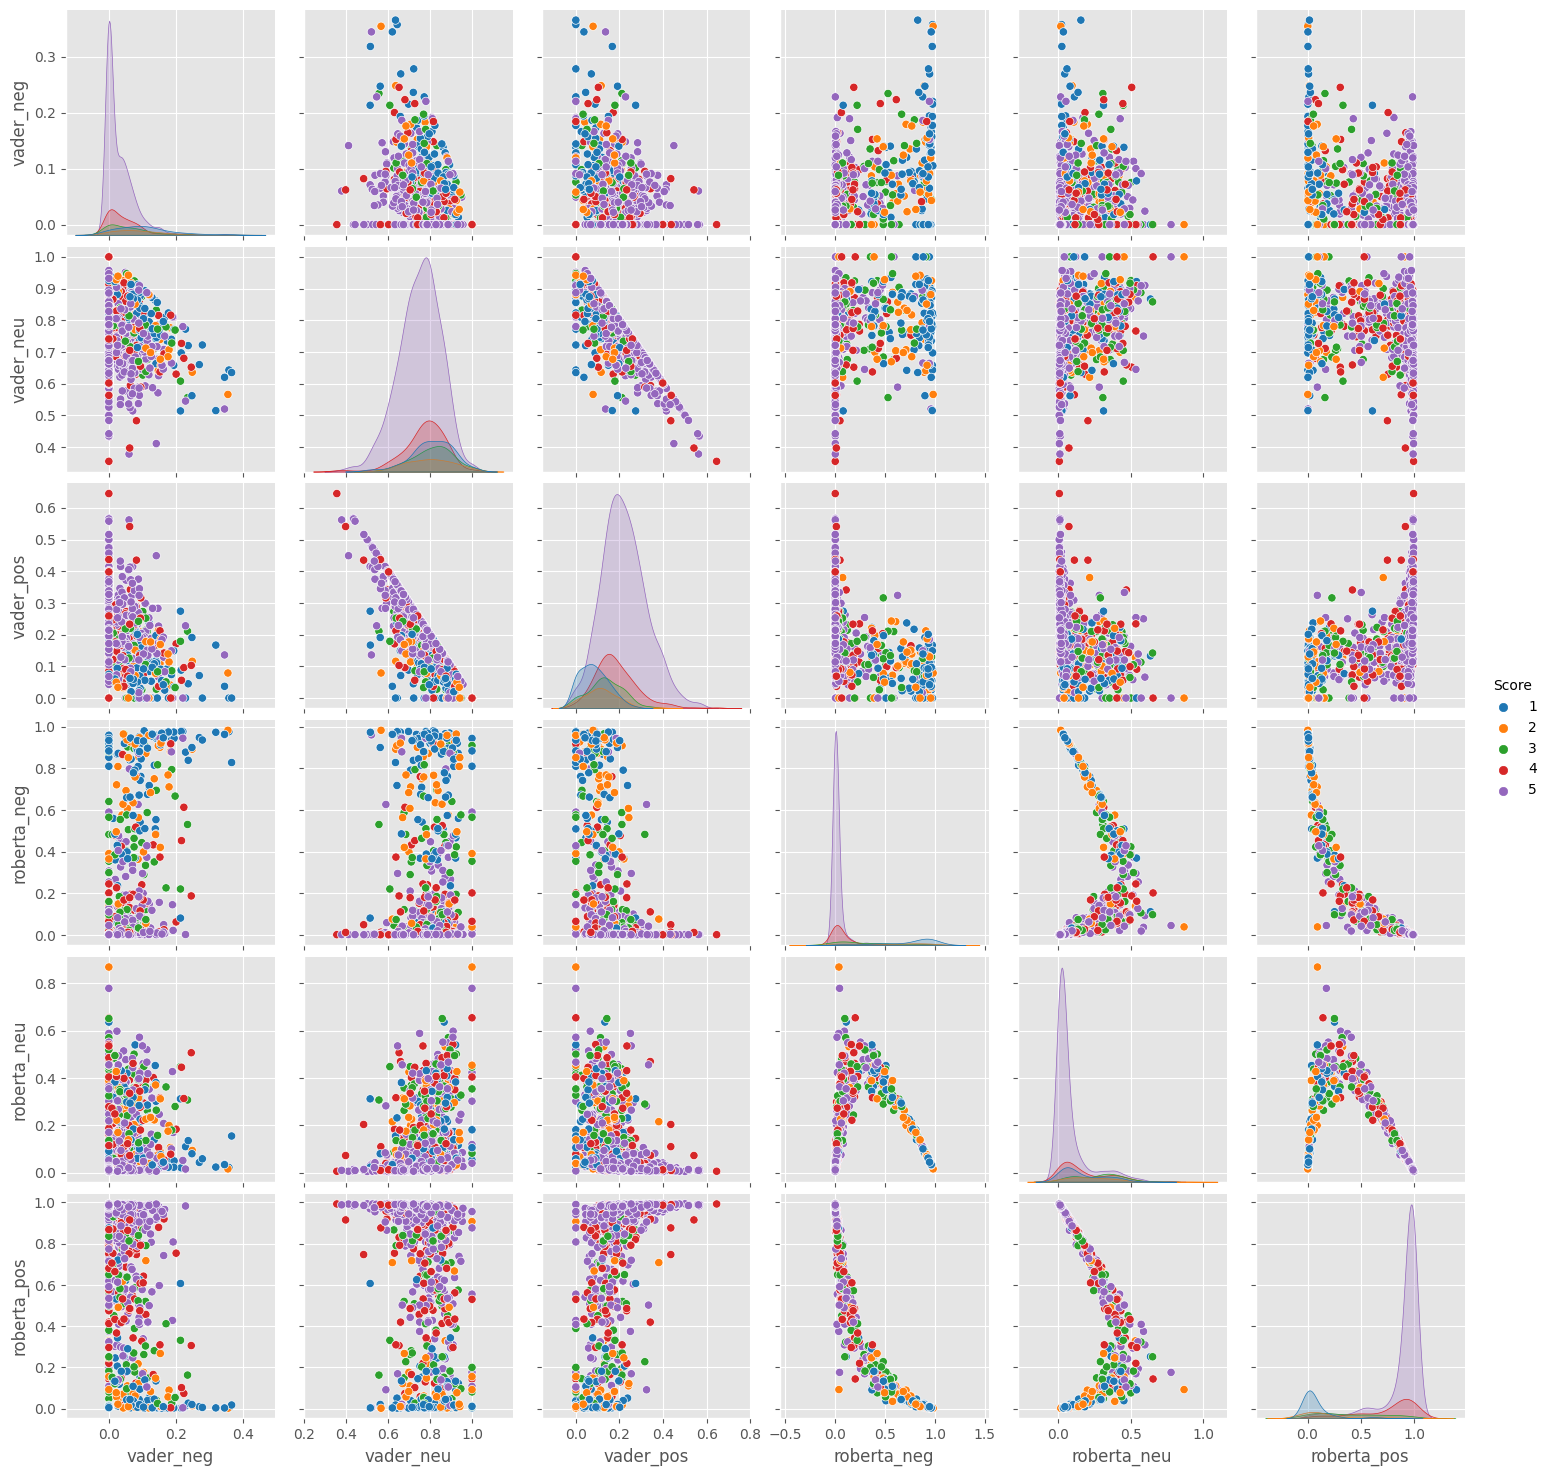

In [48]:
sns.pairplot(data=result_df1,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

Contrasting examples, those complex language reviews for which our model fails

In [49]:
# for roberta

result_df1.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]


"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [50]:
result_df1.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [51]:
# for vader
result_df1.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [52]:
result_df1.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

# Transformer Pipeline

In [53]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [55]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [56]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]